<a href="https://colab.research.google.com/github/jeftersantiago/ic_redes_complexas/blob/master/IC_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do notebook
Pequenos projetos de redes complexas utilizando o pacote `networkX`.

## Pacotes utilizados

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Utilidades básicas do NetworkX

- Criação de grafo
- Adição de vertices e arestas
- Remoção de vertices e arestas
- Grafos dirigidos, dígrafos, grafos ponderado
- Visualização de grafos
- Acesso à vertices e arestas
- União de grafos
- Composição de grafos
- Conversão de grafos
  - Grafos dirigidos em não dirigidos
  - Grafos nao dirigidos em dirigidos
  - Grafos ponderados em nao ponderados.



## Criando um grafo

In [3]:
G = nx.Graph()

## Incluir vertices no grafo

In [4]:
G.add_node("Node 1")
G.add_node("Node 2")
G.add_node("Node 3")
G.add_node("Node 4")
G.add_node("Node 5")
G.add_node("Node 6")

## Incluir arestas no grafo

In [5]:
G.add_edge("Node 1", "Node 2")
G.add_edge("Node 2", "Node 3")
G.add_edge("Node 4", "Node 3")
G.add_edge("Node 1", "Node 3")
G.add_edge("Node 5", "Node 4")
G.add_edge("Node 5", "Node 6")
G.add_edge("Node 1", "Node 6")

## Visualização de um grafo

Link Network - sprint_layout = https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html


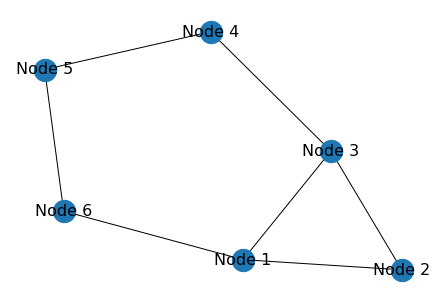

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show(True)

## Alterando estrutura de um grafo

- Remoção de aresta

In [7]:
G.remove_edge("Node 1", "Node 2")

 - Remoção de vertice

In [8]:
G.remove_node("Node 1")
G.remove_node("Node 5")

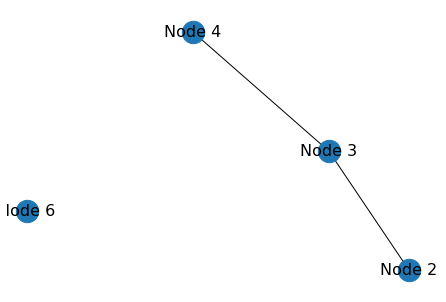

In [9]:
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

## Grafo ponderado
Weighted Graph - Network : https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

In [10]:
Gw = nx.Graph()

Gw.add_edge('a', 'b', weight = 0.1)
Gw.add_edge('a', 'c', weight = 0.4)
Gw.add_edge('c', 'b', weight = 0.3)
Gw.add_edge('d', 'b', weight = 0.2)
Gw.add_edge('d', 'a', weight = 0.9)

Visualizando grafo ponderado

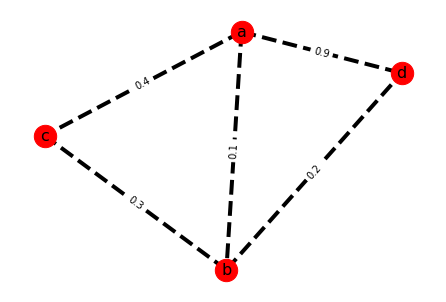

In [11]:
labels = Gw.nodes()
pos = nx.spring_layout(Gw)
nx.draw(Gw, with_labels = True, node_color = 'r', node_size = 500, font_size = 16, pos=pos, width= 4 , style="dashed")
edge_labels = nx.get_edge_attributes(Gw, "weight")
nx.draw_networkx_edge_labels(Gw, pos, edge_labels)
plt.show()

Adição de arestas e criação de rede "mista" com arestas ponderadas e não ponderadas.

In [12]:
Gw.add_edge(1, 2, weight = 4.2)
Gw.add_edge(1, 'c')

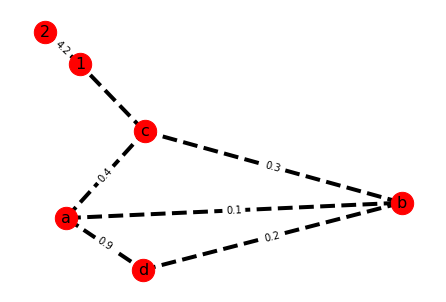

In [13]:
labels = Gw.nodes()
pos = nx.spring_layout(Gw)
nx.draw(Gw, with_labels = True, node_color = 'r', node_size = 500, font_size = 16, pos=pos, width= 4 , style="dashed")
edge_labels = nx.get_edge_attributes(Gw, "weight")
nx.draw_networkx_edge_labels(Gw, pos, edge_labels)
plt.show()

## Criando grafos através de matriz de adjacências

Usando a função from_numpy_array: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html

podemos gerar um grafo a partir de uma matriz de adjacências.

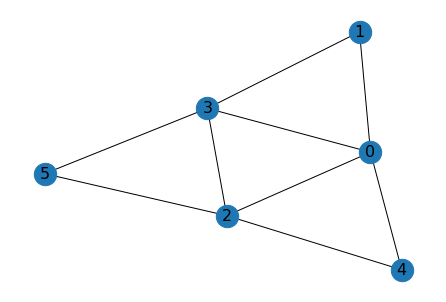

In [14]:
# matriz de adjacencia de uma rede qualquer.
A = [[0, 1, 1, 1, 1, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 1], 
     [1, 1, 1, 0, 0, 1], [1, 0, 1, 0, 0,0], [0, 0,1, 1, 0, 0]]
G = nx.from_numpy_array(np.array(A))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

## Definindo um DiGrafo

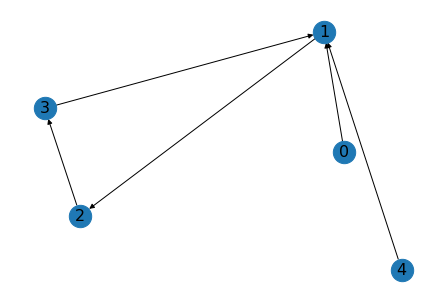

In [15]:
G.clear()
# Outra forma de gerar um grafo com vertices e arestas (sem necessariamente usar as funcoes add_node ou add_edge)
edgelist = [(0, 1), (1, 2), (2, 3), (3, 1), (4, 1)]
G = nx.DiGraph(edgelist)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

## Acessando vertices 

A biblioteca NetworkX define os usando estruturas de dicionarios e isso facilita torna bem simples a adicao/busca de informacoes em um grafo, abaixo está uma forma de adicionar novos vertices e informacoes (que pode ser string ou qualquer tipo de dado ou objeto) a algum vertice do grafo

In [16]:
G = nx.Graph()

G.add_node("Node 1")
G.add_node("Node 2")
G.add_node("Node 3")
G.add_node("Node 4")
G.add_node("Node 5")
G.add_node("Node 6")

G.add_edge("Node 1", "Node 2")
G.add_edge("Node 2", "Node 3")
G.add_edge("Node 4", "Node 3")
G.add_edge("Node 1", "Node 3")
G.add_edge("Node 5", "Node 4")
G.add_edge("Node 5", "Node 6")
G.add_edge("Node 1", "Node 6")

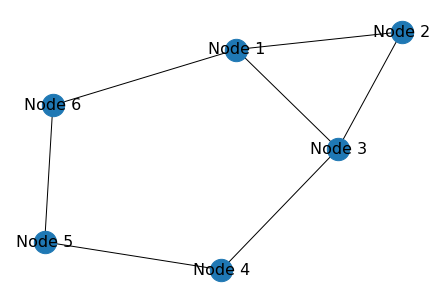

In [17]:
pos = nx.spring_layout(G)

nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

Adicionando vertice que contem algum tipo de dado.

In [18]:
G.add_edge("Node 1", "Node 5", time = '10 pm')
G.add_node("Node 7", time = "3 pm")

Acessando vértices e arestas

In [19]:
# Estrutura de dicionario do Python.
print(G.edges)
# Conteudo da aresta.
print(G.edges["Node 1", "Node 5"])
# Conteudo do vertice.
print(G.nodes["Node 7"])

[('Node 1', 'Node 2'), ('Node 1', 'Node 3'), ('Node 1', 'Node 6'), ('Node 1', 'Node 5'), ('Node 2', 'Node 3'), ('Node 3', 'Node 4'), ('Node 4', 'Node 5'), ('Node 5', 'Node 6')]
{'time': '10 pm'}
{'time': '3 pm'}


## Convertendo labels de grafos


In [20]:
G = nx.convert_node_labels_to_integers(G, first_label = 0)
for node in G.nodes():
  print("Node: ", node)

Node:  0
Node:  1
Node:  2
Node:  3
Node:  4
Node:  5
Node:  6


Percorrendo arestas de um grafo

Associando pesos à arestas

In [21]:
G.edges[1, 2]["weight"] = 4.3

In [22]:
for n in G.edges(data = True):
  print(n)

(0, 1, {})
(0, 2, {})
(0, 5, {})
(0, 4, {'time': '10 pm'})
(1, 2, {'weight': 4.3})
(2, 3, {})
(3, 4, {})
(4, 5, {})


## Uniao de grafos


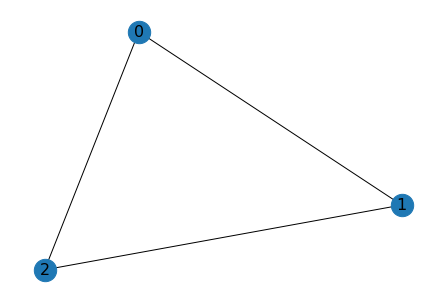

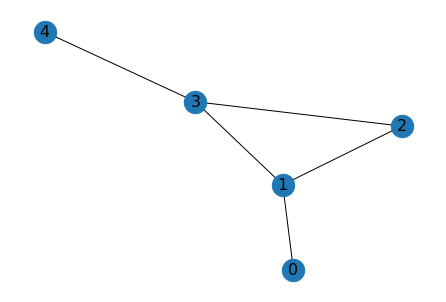

In [23]:
G0 = nx.Graph([(0, 1), (1, 2), (2, 0)])
nx.draw(G0, with_labels = True, node_size = 500, font_size = 16)
plt.show()

G1 = nx.Graph([(0, 1), (1, 3), (1, 2), (2, 3), (3, 4)])
nx.draw(G1, with_labels = True, node_size = 500, font_size = 16)
plt.show() 

Usando a função disjoint_union (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.operators.binary.disjoint_union.html)
**a função assume que todos vertices sao diferentes**.
a função atribui um novo label a vertices que tem o mesmo label.

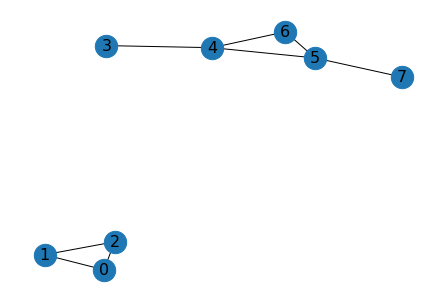

In [24]:
G2 = nx.disjoint_union(G0, G1)
nx.draw(G2, with_labels = True, node_size = 500, font_size = 16)
plt.show()

## Composição de grafos
Nesse caso considera que os vertices de label igual sao os mesmos. 

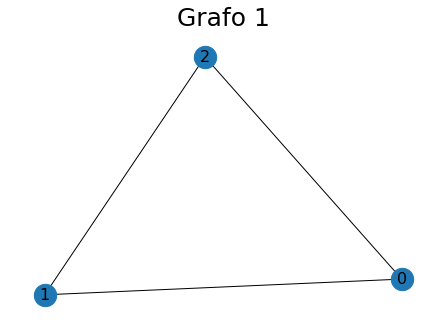

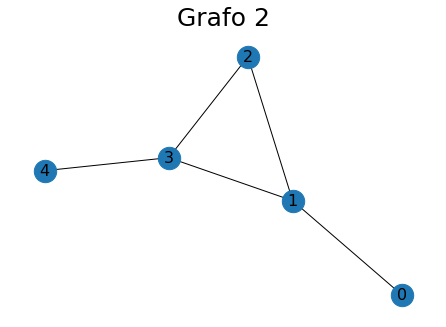

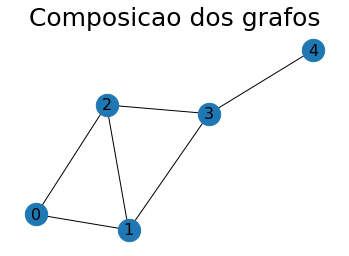

In [25]:
G0 = nx.Graph([(0, 1), (1, 2), (2, 0)])
nx.draw(G0, with_labels = True, node_size = 500, font_size = 16)
plt.title("Grafo 1", fontsize = 25)
plt.show()

G1 = nx.Graph([(0, 1), (1, 3), (1, 2), (2, 3), (3, 4)])
nx.draw(G1, with_labels = True, node_size = 500, font_size = 16)
plt.title("Grafo 2", fontsize = 25)
plt.show() 

G2 = nx.compose(G0, G1)
plt.title("Composicao dos grafos", fontsize = 25)
nx.draw(G2, with_labels = True, node_size = 500, font_size = 16)
plt.show()

## Conversão de grafos

- DiGrafo em grafo nao dirigido

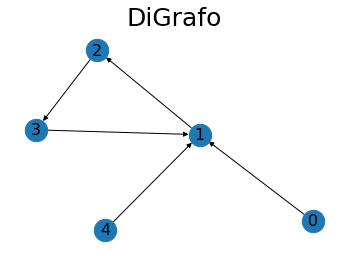

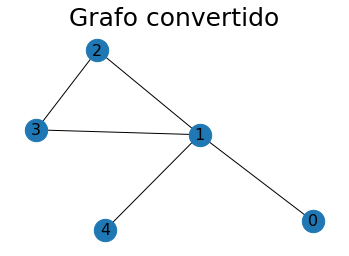

In [26]:
edgelist = [(0,1), (1, 2), (2, 3), (3, 1), (4, 1)]
G = nx.DiGraph(edgelist)
pos = nx.spring_layout(G)
plt.title("DiGrafo", fontsize = 25)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()


# Conversao
G = G.to_undirected()

plt.title("Grafo convertido", fontsize = 25)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

- Conversao de grafo nao dirigido para Dígrafo

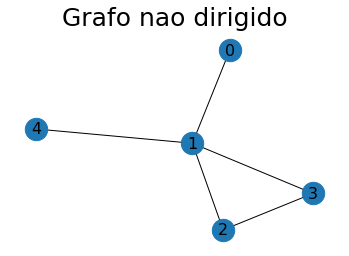

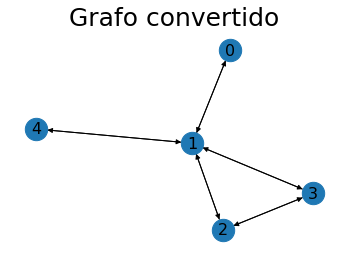

In [27]:
edgelist = [(0,1), (1, 2), (2, 3), (3, 1), (4, 1)]
G = nx.Graph(edgelist)
pos = nx.spring_layout(G)
plt.title("Grafo nao dirigido", fontsize = 25)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()


G = G.to_directed()
plt.title("Grafo convertido", fontsize = 25)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

Convertendo grafo ponderado em grafo não ponderado

In [28]:
G = nx.Graph()

G.add_edge(1, 2, weight = 1.1)
G.add_edge(2, 3, weight = 0.4)
G.add_edge(3, 1, weight = 2.3)
G.add_edge(4, 1, weight = 0.2)
G.add_edge(4, 2, weight = 5.9)

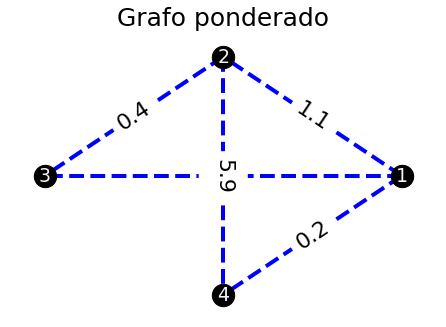

In [29]:
labels = G.nodes()
# circular_layout = https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html
pos = nx.circular_layout(G)
nx.draw(G, with_labels = True, node_color = 'black', node_size = 500, font_size = 19, font_color="whitesmoke", 
          pos=pos, width= 4 , edge_color="b", style="dashed")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=22)
plt.title("Grafo ponderado",  fontsize = 25)
plt.show()

Para converter vamos definir um peso minimo para as arestas do grafo e percorrer as arestas, as que tiverem peso igual ou menor ao peso minimo vão ter seu peso convertido para $1$.

In [30]:
min_weight = 1.0
Gnew = nx.Graph()
for(u, v, w) in G.edges(data = True):
  if w['weight'] > min_weight:
    Gnew.add_edge(u, v, weight=1)

G = Gnew

[]

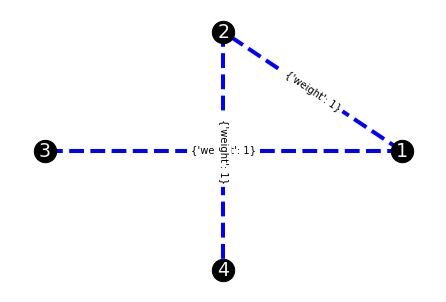

In [31]:
labels = Gnew.nodes()
pos = nx.circular_layout(Gnew)

nx.draw(G, with_labels = True, node_color = 'black', node_size = 500, font_size = 19, font_color="whitesmoke", 
          pos=pos, width= 4 , edge_color="b", style="dashed")
nx.draw_networkx_edge_labels(Gnew, pos)
plt.plot()

## Lendo um grafo a partir de um arquivo 



# Resultados em redes complexas 

- Componentes de uma rede
- Acesso a vizinhos
- Medidas de conectivdade
- Medidas de transitividade
- Medidas de centralidade
- Detecção de comunidades

## Detectar componentes

**Alguns resultados em redes complexas são avaliados apenas em algum (s) componentes de uma rede**

Pos isso algoritmos que detectam e fornecem componenetes de uma rede são relevantes.


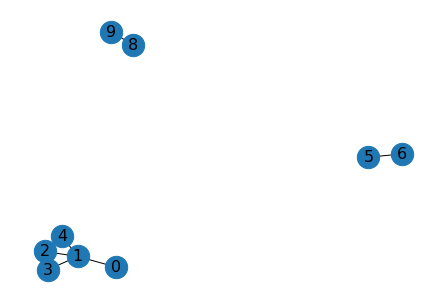

In [32]:
G = nx.Graph([(0, 1), (1, 2), (2, 3), (3, 1), (4, 1), (2, 4), (5, 6), (9, 8)])

pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, with_labels = True, node_size = 500, font_size = 16, pos = pos)
plt.show()

In [33]:
# Obtendo componentes
Gcc = sorted(nx.connected_components(G), key = len, reverse = True)

print(Gcc)

[{0, 1, 2, 3, 4}, {5, 6}, {8, 9}]


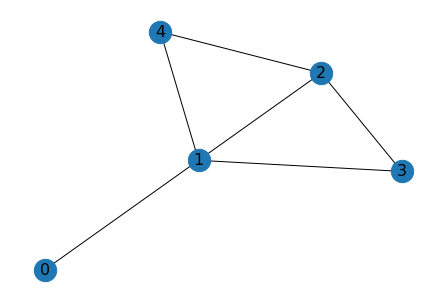

In [34]:
# Obtendo maior componente

G0 = G.subgraph(Gcc[0]) # foi ordenado 
nx.draw(G0, with_labels = True, node_size = 500, font_size = 16)
plt.show()

## Acesso a vizinhos em uma rede

Como exemplo de acesso a vizinhos em uma rede usei o grafo do clube de karate, exemplo da galeria do NetworkX: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html


Vertices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Vertice selecionado =  2
Vertices vizinhos ao selecionado =  [0, 1, 3, 7, 8, 9, 13, 27, 28, 32]


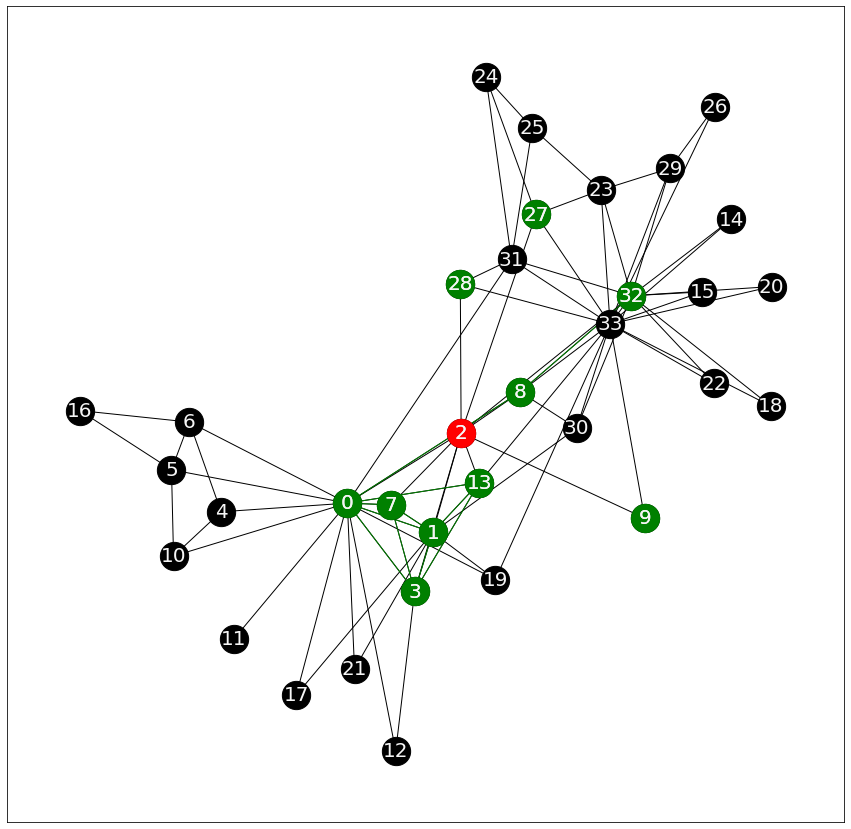

In [35]:
G = nx.karate_club_graph()
node = 2
subset = list(G.neighbors(node))

print("Vertices", G.nodes)
print("Vertice selecionado = ", node)
print("Vertices vizinhos ao selecionado = ", subset)
# Vertice cujos vizinhos vao ser acessados

pos = nx.spring_layout(G)
k = G.subgraph(subset)
nodei = G.subgraph(node)

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos = pos,node_size = 800, font_size = 20, node_color = "black", font_color="whitesmoke", edge_color = "black")
nx.draw_networkx(k, pos = pos,node_size = 800, font_size = 20, node_color = "green", font_color="whitesmoke", edge_color = "green")
nx.draw_networkx(nodei, pos = pos, node_size = 800, font_size = 20, node_color = "red", font_color="whitesmoke", edge_color = "red")
plt.show()

## Medidas de conectividade


### Grau de um vertice
Grau de um vertice é a quantidade de conexões um vertice possui. Para o caso de grafos com estrutura de matriz de adjacências o grau dos vertices podem ser calculados pela formula: 
\begin{equation} 
k_i = \sum_{j = 1}^{N} A_{ij}
\end{equation}

#### Grau médio de um vertice

É a esperança $\left( E[k] = \sum_{j=1}^{N}\frac{k_j}{N} \right)$ de $k$ 
$$\langle k \rangle = \frac{1}{N} \sum_{i = 1}^{N} k_i $$

##### Em redes dirigidas

Em redes desse tipo o grau médio tem duas categorias, entrada e saída, portanto

$$ \langle k^{\text{in}} \rangle = \frac{1}{N} \sum_{i = 1}^{N} k_i^{\text{in}} \quad \quad \langle k^{\text{out}} \rangle = \frac{1}{N} \sum_{i = 1}^{N} k_i^{\text{out}}$$


### Distribuição de graus
É importante na caracterização da rede e sua topologia, o grau médio apenas não é o bastante para estimar com maior certeza resultados a cerca da rede. Fazendo uma distribuição podemos fazer varias medidas relacionadas ao grau de uma rede.

Seja $P(K)$ a probabilidade de selecionar um vértice com grau $k$, com $P(K) = \frac{N_k}{N}, k = 0, 1, 2, \cdots$. 

A partir desses calculos podemos fazer diversos tipos de medidas estatísticas.

## Medidas de transitividade

Ocorrência de triângulos em uma rede.

Para uma rede com objetos $A$ e $B$ conectados, onde $B$ é conectado com $C$, então a probabilidade $A$ também estar conectado a $C$ é dada por 
$$ C = \frac{3 \times \text{número de triângulos}}{\text{Número de conexões de triplas de vértices}}$$


## Medidas de centralidade

# Modelos de grafos

- Grafos aleatórios
- Grafo de Erdos-Renyi (Modelo $G_{np}$)
- Modelo de Barabási-Albert

# Simulações
- [X] Resultado de percolação em redes complexas de Erdos-Renyi
- [ ] Reproduzir o resultado sobre o efeito de mundo pequeno de Watts e Strogatz .
- [ ] Reproduzir o resultado de resiliência a ataques aleatórios e direcionados de redes com distribuição
de grau livre de escala de Albert, Jeong e Barabási

## Percolação em redes complexas (Erdos-Renyi)



In [36]:
# numero de nós no grafo
n = 500 
# Lista de probabilidades p de criação de arestas.
p = np.linspace(0, 0.1, n)

# Lista com tamanho dos maiores componentes
largest_cc = []
start_time = time.time()
# Cria grafo de Erdos-Renyi para cada probabilidade p e
# armazena o valor do maior componente na lista.
for i in range(n):
    # Lista de grafos aleatorios com probabilidade p.
    er = nx.gnp_random_graph(n,p[i])
    # Tamanho do maior componente para cada probabilidade.
    largest_cc.append(len(max(nx.connected_components(er), key=len)))

# total_time = time.time() - start_time
# print("For n = ", n)
# print("--- %s seconds ---" % total_time )

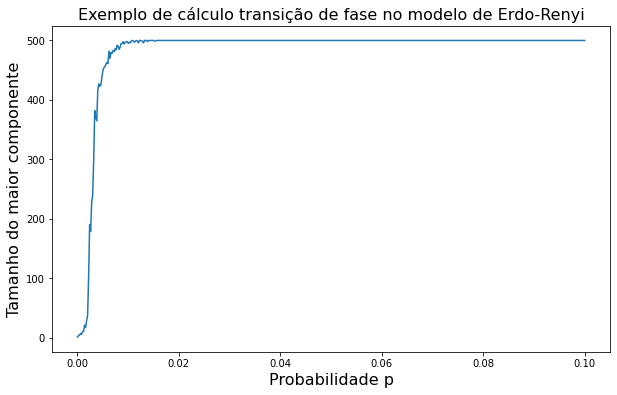

In [37]:
plt.figure(figsize=(10,6))
plt.plot(p, largest_cc)
plt.title("Exemplo de cálculo transição de fase no modelo de Erdo-Renyi", fontsize = 16)
plt.xlabel("Probabilidade p", fontsize = 16)
plt.ylabel("Tamanho do maior componente", fontsize = 16)
plt.show()

## Efeito de mundo pequeno (Strogatz-Watts)

## Resiliêncai a ataques aleatórios e direcionados (Albert, Barabási e Jeong)